<a href="https://colab.research.google.com/github/Jocelyn-Garcia4rt/Graficas_INEGI/blob/main/Copia_de_PruebaDeHipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hipótesis

H0(NULA) : No hay diferencia significativa entre las calificaciones antes y después.

H1: Existe una diferencia significativa entre las calificaciones antes y después.

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Practica_Hipotesis.xlsx to Practica_Hipotesis.xlsx


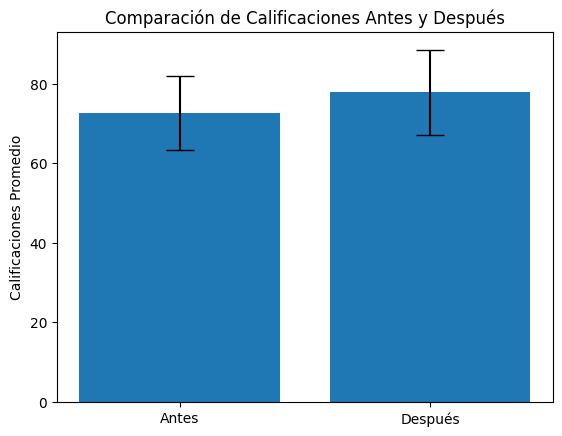

Valor Z: 5.68
Valor p: 0.0000
Se rechaza H0: Hay diferencia significativa.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Cargar los datos
file_path = "Practica_Hipotesis.xlsx"
df_comparacion = pd.read_excel(file_path, sheet_name="Comparacion_Medias")

# Calcular medias y desviaciones estándar
mean_antes = df_comparacion["Calificación Antes"].mean()
mean_despues = df_comparacion["Calificación Después"].mean()
std_antes = df_comparacion["Calificación Antes"].std(ddof=1)  # Desviación estándar muestral
std_despues = df_comparacion["Calificación Después"].std(ddof=1)
n = len(df_comparacion)

# Prueba Z para comparar medias
z = (mean_despues - mean_antes) / np.sqrt((std_antes*2 / n) + (std_despues*2 / n))
p_value = 2 * (1 - norm.cdf(abs(z)))  # Dos colas

# Gráfica de barras comparativas
plt.bar(["Antes", "Después"], [mean_antes, mean_despues], yerr=[std_antes, std_despues], capsize=10)
plt.ylabel("Calificaciones Promedio")
plt.title("Comparación de Calificaciones Antes y Después")
plt.show()

# Resultados
print(f"Valor Z: {z:.2f}")
print(f"Valor p: {p_value:.4f}")
if p_value < 0.05:
    print("Se rechaza H0: Hay diferencia significativa.")
else:
    print("No se rechaza H0: No hay diferencia significativa.")

Pregunta Crítica: ¿Qué implicaciones tiene el resultado para un programa educativo?

Si se rechaza H0, implica que el programa educativo tuvo un impacto positivo en las calificaciones. Esto podría justificar su implementación a mayor escala. Si no se rechaza H0, se debe revisar el diseño del programa.

Parte 2

Hipótesis

H0: La proporción de clientes satisfechos es igual en ambas sucursales.

H1: La proporción de clientes satisfechos es diferente entre las sucursales.

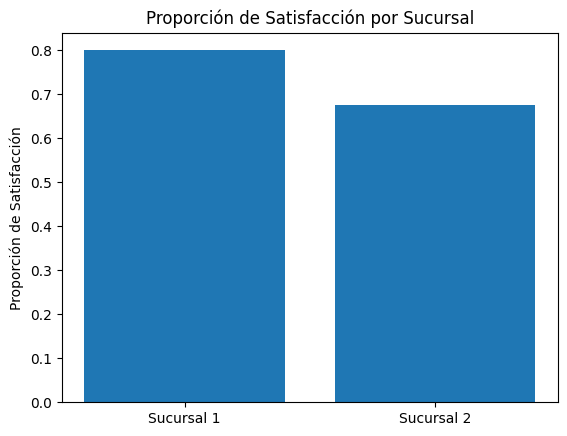

Valor Z: 2.08
Valor p: 0.0372
Se rechaza H0: Las proporciones son diferentes.


In [ ]:
# Cargar los datos
df_proporciones = pd.read_excel(file_path, sheet_name="Proporciones")

# Separar datos por sucursal
sucursal1 = df_proporciones[df_proporciones["Sucursal"] == "Sucursal 1"]["Satisfecho"]
sucursal2 = df_proporciones[df_proporciones["Sucursal"] == "Sucursal 2"]["Satisfecho"]

# Calcular proporciones
p1 = sucursal1.mean()
p2 = sucursal2.mean()
n1 = len(sucursal1)
n2 = len(sucursal2)
p_combined = (sum(sucursal1) + sum(sucursal2)) / (n1 + n2)

# Prueba Z para proporciones
z = (p1 - p2) / np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
p_value = 2 * (1 - norm.cdf(abs(z)))

# Gráfico de barras
plt.bar(["Sucursal 1", "Sucursal 2"], [p1, p2])
plt.ylabel("Proporción de Satisfacción")
plt.title("Proporción de Satisfacción por Sucursal")
plt.show()

# Resultados
print(f"Valor Z: {z:.2f}")
print(f"Valor p: {p_value:.4f}")
if p_value < 0.05:
    print("Se rechaza H0: Las proporciones son diferentes.")
else:
    print("No se rechaza H0: Las proporciones son iguales.")

¿Qué acciones recomendarías basándote en los resultados? Si las proporciones difieren, investigar las prácticas de la sucursal con menor satisfacción para mejorarlas.

En que se debe buscar el porque en la sucursal 1 se tiene una mejor satisfaccion por sucursal, ya sea en el pruducto, servicio o atencion al cliente. Con ellos observar el porque en la segunsa sucursal su servicio disminuye, detectando loss problemas y asi se buscaria solucionar el problema de la diferencia de satisfaccion de la segunda.

Parte 3

Hipótesis

H0: No hay diferencia significativa en los salarios entre hombres y mujeres.

H1: Existe una diferencia significativa en los salarios entre hombres y mujeres

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Practica_Hipotesis - Diferencias_Grupos.csv to Practica_Hipotesis - Diferencias_Grupos.csv


In [ ]:
import pandas as pd
original_date = pd.read_csv('Practica_Hipotesis - Diferencias_Grupos.csv')
original_date

,Empleado,Género,Salario
0,Emp_1,Hombre,"55815,81876"
1,Emp_2,Hombre,"50051,16531"
2,Emp_3,Hombre,"45092,45674"
3,Emp_4,Hombre,"52310,51737"
4,Emp_5,Hombre,"50995,29848"
...,...,...,...
105,Emp_106,Mujer,"47916,71003"
106,Emp_107,Mujer,"57949,01467"
107,Emp_108,Mujer,"42958,50857"
108,Emp_109,Mujer,"42801,39079"


<ipython-input-11-2b3072467cc1>:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([salarios_hombres, salarios_mujeres], labels=['Hombres', 'Mujeres'])


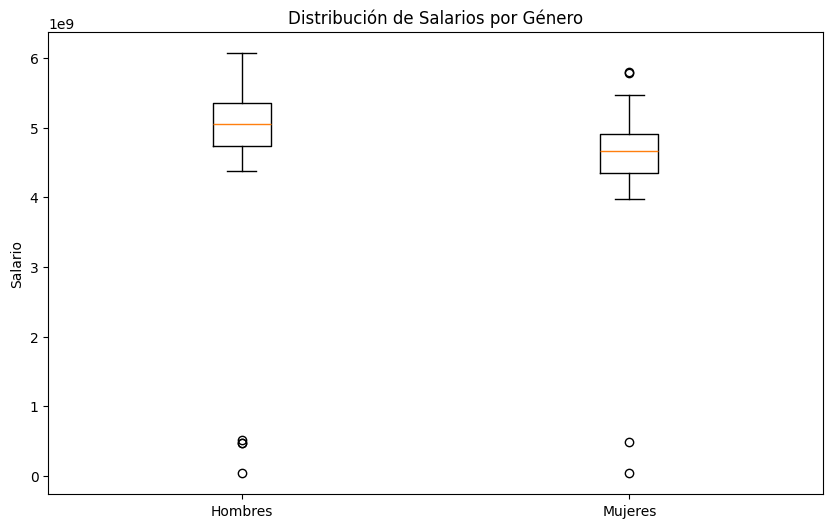

Media de salarios de hombres: 4804809329.666667
Media de salarios de mujeres: 4541560556.98
Valor Z: 29297.26735852714
Valor p: 0.0
Rechazamos la hipótesis nula: Hay suficiente evidencia


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Cargar los datos
data = pd.read_csv('Practica_Hipotesis - Diferencias_Grupos.csv', delimiter=',')
data['Salario'] = data['Salario'].str.replace(',', '').astype(float)

# Separar los datos por género
salarios_hombres = data[data['Género'] == 'Hombre']['Salario']
salarios_mujeres = data[data['Género'] == 'Mujer']['Salario']

# Calcular las medias y desviaciones estándar
media_hombres = np.mean(salarios_hombres)
media_mujeres = np.mean(salarios_mujeres)
std_hombres = np.std(salarios_hombres, ddof=1)
std_mujeres = np.std(salarios_mujeres, ddof=1)
n_hombres = len(salarios_hombres)
n_mujeres = len(salarios_mujeres)

# Realizar la prueba Z
z_score = (media_hombres - media_mujeres) / np.sqrt((std_hombres*2 / n_hombres) + (std_mujeres*2 / n_mujeres))
p_value = stats.norm.sf(abs(z_score)) * 2

# Evaluar si se rechaza H0
alpha = 0.05
rechazar_h0 = p_value < alpha

# Generar boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([salarios_hombres, salarios_mujeres], labels=['Hombres', 'Mujeres'])
plt.title('Distribución de Salarios por Género')
plt.ylabel('Salario')
plt.show()

# Imprimir resultados
print(f'Media de salarios de hombres: {media_hombres}')
print(f'Media de salarios de mujeres: {media_mujeres}')
print(f'Valor Z: {z_score}')
print(f'Valor p: {p_value}')

if rechazar_h0:
    print("Rechazamos la hipótesis nula: Hay suficiente evidencia")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia")

¿Qué implicaciones éticas y laborales tienen tus hallazgos? Si hay diferencias significativas, podría indicar discriminación salarial. Se deben tomar medidas para garantizar equidad

Hay una implicacion de que se reconozca mas el trabajo del hombre que el de una mujer a la hora de realizar el mismo trabajo. Causando una desigualdad en ello al no reconocer que ambos estan haciendo el mismo trabajo y no se resive el salario de forma equitativa.

Parte 4

Hipótesis

H0: No hay diferencia significativa en los salarios entre hombres y mujeres.

H1: Existe una diferencia significativa en los salarios entre hombres y mujeres

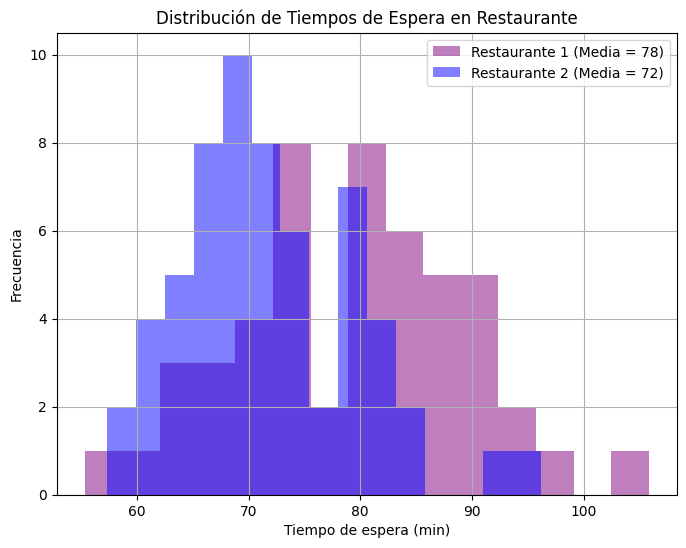

Valor calculado de z: 7.35
Valor crítico de z para una prueba bilateral (α = 0.05): 1.96
Valor p: 0.0000
Rechazamos la hipótesis nula: Hay suficiente evidencia para concluir que los tiempos de espera son diferentes.


In [ ]:
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import numpy as np

# Datos de los dos restaurantes
x_bar1 = 78  # Media del primer restaurante
x_bar2 = 72  # Media del segundo restaurante
sigma1 = 10  # Desviación estándar del primer restaurante
sigma2 = 8   # Desviación estándar del segundo restaurante
n1 = 50      # Tamaño de muestra del primer restaurante
n2 = 60      # Tamaño de muestra del segundo restaurante
alpha = 0.05 # Nivel de significancia

# Prueba Z para comparación de dos medias
z = (x_bar1 - x_bar2) / math.sqrt((sigma1*2 / n1) + (sigma2*2 / n2))

# Cálculo del valor p
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Determinar valores críticos
z_critical = stats.norm.ppf(1 - alpha / 2)

# Histograma superpuesto
data_rest1 = np.random.normal(x_bar1, sigma1, n1)
data_rest2 = np.random.normal(x_bar2, sigma2, n2)

plt.figure(figsize=(8, 6))
plt.hist(data_rest1, bins=15, alpha=0.5, label='Restaurante 1 (Media = 78)', color='purple')
plt.hist(data_rest2, bins=15, alpha=0.5, label='Restaurante 2 (Media = 72)', color='blue')
plt.title('Distribución de Tiempos de Espera en Restaurante')
plt.xlabel('Tiempo de espera (min)')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Resultados
print(f"Valor calculado de z: {z:.2f}")
print(f"Valor crítico de z para una prueba bilateral (α = 0.05): {z_critical:.2f}")
print(f"Valor p: {p_value:.4f}")

# Evaluación de la hipótesis
if abs(z) > z_critical:
    print("Rechazamos la hipótesis nula: Hay suficiente evidencia para concluir que los tiempos de espera son diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para concluir que los tiempos de espera son diferentes.")

¿Cómo podría mejorar la experiencia del cliente en el restaurante con mayor tiempo de espera? Mejorar la logística en el restaurante con mayores tiempos de espera

Es clave optimizar tanto la logística como la comunicación y la comodidad del cliente.

*Capacitación continua al personal: Formar a los cocineros y al personal de
servicio para manejar situaciones de alta demanda puede acelerar el servicio y mejorar la experiencia del cliente.

*Pre-preparación: Preparar ingredientes con antelación para reducir los tiempos de espera durante el servicio.

*Sistema de reservas eficiente: Implementar un sistema de reservas en línea o una aplicación que permita a los clientes ver los tiempos de espera en tiempo real.

*Gestionar la distribución de mesas: Un software de gestión de mesas puede ayudar a maximizar la ocupación y reducir los tiempos de espera al gestionar las reservas y asignación de mesas de manera más eficiente.

Parte 5

Hipótesis

H0: No hay diferencia significativa en los salarios entre hombres y mujeres.

H1: Existe una diferencia significativa en los salarios entre hombres y mujeres

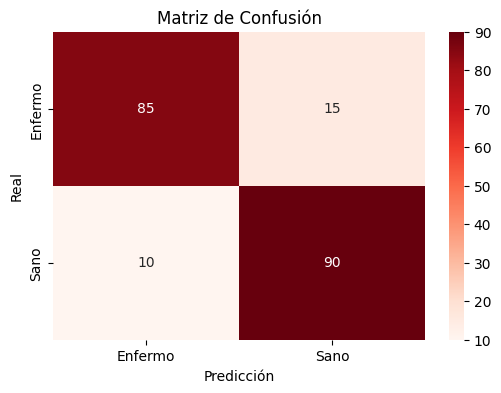

Tasa de falsos positivos (Error Tipo I): 10.00%
Tasa de falsos negativos (Error Tipo II): 15.00%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Datos de ejemplo (número de casos)
VP = 85  # Verdaderos Positivos
FP = 10  # Falsos Positivos
FN = 15  # Falsos Negativos
VN = 90  # Verdaderos Negativos

# Matriz de confusión
matrix = np.array([[VP, FN],
                    [FP, VN]])

# Cálculo de tasas de error
tasa_fp = FP / (FP + VN)  # Tasa de falsos positivos (Error Tipo I)
tasa_fn = FN / (FN + VP)  # Tasa de falsos negativos (Error Tipo II)

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Enfermo', 'Sano'],
            yticklabels=['Enfermo', 'Sano'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Resultados
print(f"Tasa de falsos positivos (Error Tipo I): {tasa_fp:.2%}")
print(f"Tasa de falsos negativos (Error Tipo II): {tasa_fn:.2%}")

¿Qué estrategia recomendarías para minimizar los errores en pruebas médicas? Balancear α para minimizar ambos tipos de errores según el contexto.

Ajustar los umbrales de decisión de la prueba para maximizar la precisión en función del tipo de enfermedad y el contexto


*  Para enfermedades graves con tratamiento inmediato (por ejemplo, un infarto), se podría preferir un umbral más bajo para α, aceptando más falsos positivos para asegurarse de no perder casos críticos (lo que reduce el riesgo de un error tipo II).
*  Para enfermedades menos críticas, donde los costos de tratar erróneamente son altos (por ejemplo, el diagnóstico de cáncer), se podría optar por un umbral más bajo para β, reduciendo la probabilidad de falsos negativos.

Utilizar pruebas confirmatorias. Si una prueba inicial muestra resultados ambiguos o dudosos, realizar una segunda prueba o una prueba más específica. Esto ayuda a minimizar ambos errores:


*  Si la primera prueba da un falso positivo (error tipo I), la segunda prueba debería ayudar a descartarlo.
*  Si la primera prueba da un falso negativo (error tipo II), la segunda prueba puede detectar la enfermedad que la primera no identificó.



Conclusion

Con base a la estadistica se pudo obtener los datos de que se necesitaban para poder definir si los resusltados son los esperados (H0) o estos son los que no se esperaban (H1) permitiendo asi buscar una forma de mejorar los servicios, resultados y salarios. Tambien al hecho de el porque estos datos fueron buenos y lograr identificar el porque de dichos resultados.